In [1]:
!pip install spacy
from spacy.cli import download
download('en_core_web_sm')



✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
## Import necessary packages
import pandas as pd
import nltk

In [3]:
df = pd.read_csv('Data/Fake_Real_News_Data.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL
1,1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL
2,2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE
3,3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL
4,4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df = df.drop(columns=['Unnamed: 0'])
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


In [8]:
df.head()

,title,text,label
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL


In [9]:
df['lower_text'] = df['text'].str.lower()
df.head()

,title,text,label,lower_text
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,donald trump endorsed an unabashedly noninterv...
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,while some justice department investigations a...
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,trump proudly declares: most of the people i’v...
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,donald trump spent a day in january 2014 hobno...
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,notable names include ray washburne (commerce)...


In [10]:
df['tokens'] = df['lower_text'].str.split()
df.head()

,title,text,label,lower_text,tokens
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,donald trump endorsed an unabashedly noninterv...,"[donald, trump, endorsed, an, unabashedly, non..."
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,while some justice department investigations a...,"[while, some, justice, department, investigati..."
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,trump proudly declares: most of the people i’v...,"[trump, proudly, declares:, most, of, the, peo..."
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,donald trump spent a day in january 2014 hobno...,"[donald, trump, spent, a, day, in, january, 20..."
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,notable names include ray washburne (commerce)...,"[notable, names, include, ray, washburne, (com..."


# SpaCY Model

In [11]:
import spacy

In [12]:
## Load the model.  Disable Named Entity Recognizer (too slow)
nlp_model = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
nlp_model.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']

In [13]:
doc = nlp_model(df['text'][5])
doc

«Current Concerns», n°23, October 22th, 2016
Can the great nuclear war be prevented ? Can the great war be prevented … Russia and China are preparing for war – right in front of America’s doorstep, by Niki Vogt / Alert Memorandum for Obama warned to defuse tensions with Russia, by Veteran Intelligence Professionals for Sanity VIPS / US-Mayors warn against increasing danger of war / “We are beaten to war”, Interview with Willy Wimmer / “Let us say with conviction: No to war!” / Popular initiative for nuclear phase-out in Switzerland, by Ernst Pauli / A nuclear power plant in Bolivia using lithium instead of uranium? / Prima i nostri! Ticino population tackles ruling of immigration themselves, by Marianne Wüthrich / “Defending the identity of France means saving our dairy farmers”, by Natacha Polony / The absurdity of today’s credit system, by Myret Zaki / In Great Britain, things are moving after the Brexit, by Karl Müller / Language teaching: Avoiding unnecessary quarrels, by Pierre-Ga

In [14]:
## Display the tokens in the document
[token for token in doc]

[«,
 Current,
 Concerns,
 »,
 ,,
 n,
 °,
 23,
 ,,
 October,
 22th,
 ,,
 2016,
 ,
 Can,
 the,
 great,
 nuclear,
 war,
 be,
 prevented,
 ?,
 Can,
 the,
 great,
 war,
 be,
 prevented,
 …,
 Russia,
 and,
 China,
 are,
 preparing,
 for,
 war,
 –,
 right,
 in,
 front,
 of,
 America,
 ’s,
 doorstep,
 ,,
 by,
 Niki,
 Vogt,
 /,
 Alert,
 Memorandum,
 for,
 Obama,
 warned,
 to,
 defuse,
 tensions,
 with,
 Russia,
 ,,
 by,
 Veteran,
 Intelligence,
 Professionals,
 for,
 Sanity,
 VIPS,
 /,
 US,
 -,
 Mayors,
 warn,
 against,
 increasing,
 danger,
 of,
 war,
 /,
 “,
 We,
 are,
 beaten,
 to,
 war,
 ”,
 ,,
 Interview,
 with,
 Willy,
 Wimmer,
 /,
 “,
 Let,
 us,
 say,
 with,
 conviction,
 :,
 No,
 to,
 war,
 !,
 ”,
 /,
 Popular,
 initiative,
 for,
 nuclear,
 phase,
 -,
 out,
 in,
 Switzerland,
 ,,
 by,
 Ernst,
 Pauli,
 /,
 A,
 nuclear,
 power,
 plant,
 in,
 Bolivia,
 using,
 lithium,
 instead,
 of,
 uranium,
 ?,
 /,
 Prima,
 i,
 nostri,
 !,
 Ticino,
 population,
 tackles,
 ruling,
 of,
 immigration,
 the

In [15]:
## Isolate the last token in the document
word = doc[-1]

## Display the text and type of the token
print(word)
type(word)

)


spacy.tokens.token.Token

In [16]:
## Display the lemmatized form of the token
word.lemma_

')'

In [17]:
## Check whether the token is punctuation
word.is_punct

True

In [18]:
## Check whether the token is a space
word.is_space

False

In [19]:
## Check the part of speech of the token
word.pos_

'PUNCT'

In [20]:
[token.pos_ for token in doc]

['PUNCT',
 'ADJ',
 'PROPN',
 'PROPN',
 'PUNCT',
 'CCONJ',
 'NUM',
 'NUM',
 'PUNCT',
 'PROPN',
 'NOUN',
 'PUNCT',
 'NUM',
 'SPACE',
 'AUX',
 'DET',
 'ADJ',
 'ADJ',
 'NOUN',
 'AUX',
 'VERB',
 'PUNCT',
 'AUX',
 'DET',
 'ADJ',
 'NOUN',
 'AUX',
 'VERB',
 'PUNCT',
 'PROPN',
 'CCONJ',
 'PROPN',
 'AUX',
 'VERB',
 'ADP',
 'NOUN',
 'PUNCT',
 'ADV',
 'ADP',
 'NOUN',
 'ADP',
 'PROPN',
 'PART',
 'NOUN',
 'PUNCT',
 'ADP',
 'PROPN',
 'PROPN',
 'SYM',
 'PROPN',
 'PROPN',
 'ADP',
 'PROPN',
 'VERB',
 'PART',
 'VERB',
 'NOUN',
 'ADP',
 'PROPN',
 'PUNCT',
 'ADP',
 'PROPN',
 'PROPN',
 'PROPN',
 'ADP',
 'PROPN',
 'PROPN',
 'SYM',
 'PROPN',
 'PUNCT',
 'PROPN',
 'VERB',
 'ADP',
 'VERB',
 'NOUN',
 'ADP',
 'NOUN',
 'PUNCT',
 'PUNCT',
 'PRON',
 'AUX',
 'VERB',
 'ADP',
 'NOUN',
 'PUNCT',
 'PUNCT',
 'VERB',
 'ADP',
 'PROPN',
 'PROPN',
 'PUNCT',
 'PUNCT',
 'VERB',
 'PRON',
 'VERB',
 'ADP',
 'NOUN',
 'PUNCT',
 'INTJ',
 'ADP',
 'NOUN',
 'PUNCT',
 'PUNCT',
 'SYM',
 'ADJ',
 'NOUN',
 'ADP',
 'ADJ',
 'NOUN',
 'PUNCT',
 '

In [21]:
## [v1: List Comp] Make a list of the lemmas for each token in the document
[token.lemma_ for token in doc]

['«',
 'current',
 'Concerns',
 '»',
 ',',
 'n',
 '°',
 '23',
 ',',
 'October',
 '22th',
 ',',
 '2016',
 '\n',
 'can',
 'the',
 'great',
 'nuclear',
 'war',
 'be',
 'prevent',
 '?',
 'can',
 'the',
 'great',
 'war',
 'be',
 'prevent',
 '…',
 'Russia',
 'and',
 'China',
 'be',
 'prepare',
 'for',
 'war',
 '–',
 'right',
 'in',
 'front',
 'of',
 'America',
 '’s',
 'doorstep',
 ',',
 'by',
 'Niki',
 'Vogt',
 '/',
 'Alert',
 'Memorandum',
 'for',
 'Obama',
 'warn',
 'to',
 'defuse',
 'tension',
 'with',
 'Russia',
 ',',
 'by',
 'Veteran',
 'Intelligence',
 'Professionals',
 'for',
 'Sanity',
 'VIPS',
 '/',
 'US',
 '-',
 'Mayors',
 'warn',
 'against',
 'increase',
 'danger',
 'of',
 'war',
 '/',
 '"',
 'we',
 'be',
 'beat',
 'to',
 'war',
 '"',
 ',',
 'interview',
 'with',
 'Willy',
 'Wimmer',
 '/',
 '"',
 'let',
 'we',
 'say',
 'with',
 'conviction',
 ':',
 'no',
 'to',
 'war',
 '!',
 '"',
 '/',
 'popular',
 'initiative',
 'for',
 'nuclear',
 'phase',
 '-',
 'out',
 'in',
 'Switzerland',
 

In [22]:
lemmas_list = []
for token in doc:
    lemmas_list.append( token.lemma_)
lemmas_list

['«',
 'current',
 'Concerns',
 '»',
 ',',
 'n',
 '°',
 '23',
 ',',
 'October',
 '22th',
 ',',
 '2016',
 '\n',
 'can',
 'the',
 'great',
 'nuclear',
 'war',
 'be',
 'prevent',
 '?',
 'can',
 'the',
 'great',
 'war',
 'be',
 'prevent',
 '…',
 'Russia',
 'and',
 'China',
 'be',
 'prepare',
 'for',
 'war',
 '–',
 'right',
 'in',
 'front',
 'of',
 'America',
 '’s',
 'doorstep',
 ',',
 'by',
 'Niki',
 'Vogt',
 '/',
 'Alert',
 'Memorandum',
 'for',
 'Obama',
 'warn',
 'to',
 'defuse',
 'tension',
 'with',
 'Russia',
 ',',
 'by',
 'Veteran',
 'Intelligence',
 'Professionals',
 'for',
 'Sanity',
 'VIPS',
 '/',
 'US',
 '-',
 'Mayors',
 'warn',
 'against',
 'increase',
 'danger',
 'of',
 'war',
 '/',
 '"',
 'we',
 'be',
 'beat',
 'to',
 'war',
 '"',
 ',',
 'interview',
 'with',
 'Willy',
 'Wimmer',
 '/',
 '"',
 'let',
 'we',
 'say',
 'with',
 'conviction',
 ':',
 'no',
 'to',
 'war',
 '!',
 '"',
 '/',
 'popular',
 'initiative',
 'for',
 'nuclear',
 'phase',
 '-',
 'out',
 'in',
 'Switzerland',
 

In [23]:
[token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]

['current',
 'concerns',
 'n',
 '°',
 '23',
 'october',
 '22th',
 '2016',
 'can',
 'the',
 'great',
 'nuclear',
 'war',
 'be',
 'prevent',
 'can',
 'the',
 'great',
 'war',
 'be',
 'prevent',
 'russia',
 'and',
 'china',
 'be',
 'prepare',
 'for',
 'war',
 'right',
 'in',
 'front',
 'of',
 'america',
 '’s',
 'doorstep',
 'by',
 'niki',
 'vogt',
 'alert',
 'memorandum',
 'for',
 'obama',
 'warn',
 'to',
 'defuse',
 'tension',
 'with',
 'russia',
 'by',
 'veteran',
 'intelligence',
 'professionals',
 'for',
 'sanity',
 'vips',
 'us',
 'mayors',
 'warn',
 'against',
 'increase',
 'danger',
 'of',
 'war',
 'we',
 'be',
 'beat',
 'to',
 'war',
 'interview',
 'with',
 'willy',
 'wimmer',
 'let',
 'we',
 'say',
 'with',
 'conviction',
 'no',
 'to',
 'war',
 'popular',
 'initiative',
 'for',
 'nuclear',
 'phase',
 'out',
 'in',
 'switzerland',
 'by',
 'ernst',
 'pauli',
 'a',
 'nuclear',
 'power',
 'plant',
 'in',
 'bolivia',
 'use',
 'lithium',
 'instead',
 'of',
 'uranium',
 'prima',
 'i',
 

In [24]:
lemmas_list = []
for token in doc:
    if token.is_punct:
        continue
    if token.is_space:
        continue

    lemmas_list.append(token.lemma_.lower())

lemmas_list

['current',
 'concerns',
 'n',
 '°',
 '23',
 'october',
 '22th',
 '2016',
 'can',
 'the',
 'great',
 'nuclear',
 'war',
 'be',
 'prevent',
 'can',
 'the',
 'great',
 'war',
 'be',
 'prevent',
 'russia',
 'and',
 'china',
 'be',
 'prepare',
 'for',
 'war',
 'right',
 'in',
 'front',
 'of',
 'america',
 '’s',
 'doorstep',
 'by',
 'niki',
 'vogt',
 'alert',
 'memorandum',
 'for',
 'obama',
 'warn',
 'to',
 'defuse',
 'tension',
 'with',
 'russia',
 'by',
 'veteran',
 'intelligence',
 'professionals',
 'for',
 'sanity',
 'vips',
 'us',
 'mayors',
 'warn',
 'against',
 'increase',
 'danger',
 'of',
 'war',
 'we',
 'be',
 'beat',
 'to',
 'war',
 'interview',
 'with',
 'willy',
 'wimmer',
 'let',
 'we',
 'say',
 'with',
 'conviction',
 'no',
 'to',
 'war',
 'popular',
 'initiative',
 'for',
 'nuclear',
 'phase',
 'out',
 'in',
 'switzerland',
 'by',
 'ernst',
 'pauli',
 'a',
 'nuclear',
 'power',
 'plant',
 'in',
 'bolivia',
 'use',
 'lithium',
 'instead',
 'of',
 'uranium',
 'prima',
 'i',
 

In [25]:
[token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space and not token.is_stop]

['current',
 'concerns',
 'n',
 '°',
 '23',
 'october',
 '22th',
 '2016',
 'great',
 'nuclear',
 'war',
 'prevent',
 'great',
 'war',
 'prevent',
 'russia',
 'china',
 'prepare',
 'war',
 'right',
 'america',
 'doorstep',
 'niki',
 'vogt',
 'alert',
 'memorandum',
 'obama',
 'warn',
 'defuse',
 'tension',
 'russia',
 'veteran',
 'intelligence',
 'professionals',
 'sanity',
 'vips',
 'mayors',
 'warn',
 'increase',
 'danger',
 'war',
 'beat',
 'war',
 'interview',
 'willy',
 'wimmer',
 'let',
 'conviction',
 'war',
 'popular',
 'initiative',
 'nuclear',
 'phase',
 'switzerland',
 'ernst',
 'pauli',
 'nuclear',
 'power',
 'plant',
 'bolivia',
 'lithium',
 'instead',
 'uranium',
 'prima',
 'nostri',
 'ticino',
 'population',
 'tackle',
 'ruling',
 'immigration',
 'marianne',
 'wüthrich',
 'defend',
 'identity',
 'france',
 'mean',
 'save',
 'dairy',
 'farmer',
 'natacha',
 'polony',
 'absurdity',
 'today',
 'credit',
 'system',
 'myret',
 'zaki',
 'great',
 'britain',
 'thing',
 'move',
 

In [26]:
## [v3 For Loop - Continue] Make a list of only the tokens in the document that are not punctuation or spaces 
## Lower the casing as well
lemmas_list = []
for token in doc:
    if token.is_punct:
        continue
    if token.is_space:
        continue
    if token.is_stop:
        continue

    lemmas_list.append(token.lemma_.lower())

lemmas_list

['current',
 'concerns',
 'n',
 '°',
 '23',
 'october',
 '22th',
 '2016',
 'great',
 'nuclear',
 'war',
 'prevent',
 'great',
 'war',
 'prevent',
 'russia',
 'china',
 'prepare',
 'war',
 'right',
 'america',
 'doorstep',
 'niki',
 'vogt',
 'alert',
 'memorandum',
 'obama',
 'warn',
 'defuse',
 'tension',
 'russia',
 'veteran',
 'intelligence',
 'professionals',
 'sanity',
 'vips',
 'mayors',
 'warn',
 'increase',
 'danger',
 'war',
 'beat',
 'war',
 'interview',
 'willy',
 'wimmer',
 'let',
 'conviction',
 'war',
 'popular',
 'initiative',
 'nuclear',
 'phase',
 'switzerland',
 'ernst',
 'pauli',
 'nuclear',
 'power',
 'plant',
 'bolivia',
 'lithium',
 'instead',
 'uranium',
 'prima',
 'nostri',
 'ticino',
 'population',
 'tackle',
 'ruling',
 'immigration',
 'marianne',
 'wüthrich',
 'defend',
 'identity',
 'france',
 'mean',
 'save',
 'dairy',
 'farmer',
 'natacha',
 'polony',
 'absurdity',
 'today',
 'credit',
 'system',
 'myret',
 'zaki',
 'great',
 'britain',
 'thing',
 'move',
 

In [27]:
## [V1 List Comp] Define a function to use spacy to process our text
def spacy_process(text):
        """Lemmatize tokens, lower case, remove punctuation, spaces, and stop words"""
        doc = nlp_model(text)
        processed_doc = [token.lemma_.lower() for token in doc if not token.is_punct and 
                         not token.is_space and not token.is_stop and 
                         not 'http' in token.lemma_.lower() and 'www' not in token.lemma_.lower()]
        return processed_doc

## process the tweets using the spacy function
df['spacy_lemmas'] = df['text'].apply(spacy_process)
df.head()

,title,text,label,lower_text,tokens,spacy_lemmas
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,donald trump endorsed an unabashedly noninterv...,"[donald, trump, endorsed, an, unabashedly, non...","[donald, trump, endorse, unabashedly, noninter..."
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,while some justice department investigations a...,"[while, some, justice, department, investigati...","[justice, department, investigation, adversari..."
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,trump proudly declares: most of the people i’v...,"[trump, proudly, declares:, most, of, the, peo...","[trump, proudly, declare, people, insult, dese..."
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,donald trump spent a day in january 2014 hobno...,"[donald, trump, spent, a, day, in, january, 20...","[donald, trump, spend, day, january, 2014, hob..."
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,notable names include ray washburne (commerce)...,"[notable, names, include, ray, washburne, (com...","[notable, name, include, ray, washburne, comme..."


In [28]:
## Check class balance of 'rating'
df['label'].value_counts(normalize=True)

REAL    0.500552
FAKE    0.499448
Name: label, dtype: float64

In [47]:
## Divide documents by sentiment
REAL = df.loc[df['label'] == 'REAL']
FAKE = df.loc[df['label'] == 'FAKE']
print('REAL')
display(REAL.head())
print('FAKE')
display(FAKE.head())

REAL


,title,text,label,lower_text,tokens,spacy_lemmas,length
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,donald trump endorsed an unabashedly noninterv...,"[donald, trump, endorsed, an, unabashedly, non...","[donald, trump, endorse, unabashedly, noninter...",1428
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,while some justice department investigations a...,"[while, some, justice, department, investigati...","[justice, department, investigation, adversari...",1091
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,donald trump spent a day in january 2014 hobno...,"[donald, trump, spent, a, day, in, january, 20...","[donald, trump, spend, day, january, 2014, hob...",1959
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,notable names include ray washburne (commerce)...,"[notable, names, include, ray, washburne, (com...","[notable, name, include, ray, washburne, comme...",19
7,Democratic debate 2015: Hillary Clinton and Be...,Watch the first Democratic presidential debate...,REAL,watch the first democratic presidential debate...,"[watch, the, first, democratic, presidential, ...","[watch, democratic, presidential, debate, tues...",1404


FAKE


,title,text,label,lower_text,tokens,spacy_lemmas,length
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,trump proudly declares: most of the people i’v...,"[trump, proudly, declares:, most, of, the, peo...","[trump, proudly, declare, people, insult, dese...",408
5,Can the great nuclear war be prevented ?,"«Current Concerns», n°23, October 22th, 2016\n...",FAKE,"«current concerns», n°23, october 22th, 2016\n...","[«current, concerns»,, n°23,, october, 22th,, ...","[current, concerns, n, °, 23, october, 22th, 2...",179
6,US charges 61 with India-based scam involving ...,US charges 61 with India-based scam involving ...,FAKE,us charges 61 with india-based scam involving ...,"[us, charges, 61, with, india-based, scam, inv...","[charge, 61, india, base, scam, involve, 15,00...",165
8,What DNC Donors REALLY think of African Americans,This Video is REALLY Disturbing... \nNot just ...,FAKE,this video is really disturbing... \nnot just ...,"[this, video, is, really, disturbing..., not, ...","[video, disturbing, african, americans, americ...",87
11,Must Read of the Day – Dennis Kucinich’s Extra...,at 1:10 pm 3 Comments \nWAR is a racket. It al...,FAKE,at 1:10 pm 3 comments \nwar is a racket. it al...,"[at, 1:10, pm, 3, comments, war, is, a, racket...","[1:10, pm, 3, comment, war, racket, possibly, ...",1397


In [49]:
real_len = REAL['length'].median()
real_len

771.0

In [50]:
fake_len = FAKE['length'].median()
fake_len

421.0

In [37]:
# Create new column for finding average word counts for real and fake articles
df['length'] = df['tokens'].map(len)
df.head()

,title,text,label,lower_text,tokens,spacy_lemmas,length
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,donald trump endorsed an unabashedly noninterv...,"[donald, trump, endorsed, an, unabashedly, non...","[donald, trump, endorse, unabashedly, noninter...",1428
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,while some justice department investigations a...,"[while, some, justice, department, investigati...","[justice, department, investigation, adversari...",1091
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,trump proudly declares: most of the people i’v...,"[trump, proudly, declares:, most, of, the, peo...","[trump, proudly, declare, people, insult, dese...",408
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,donald trump spent a day in january 2014 hobno...,"[donald, trump, spent, a, day, in, january, 20...","[donald, trump, spend, day, january, 2014, hob...",1959
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,notable names include ray washburne (commerce)...,"[notable, names, include, ray, washburne, (com...","[notable, name, include, ray, washburne, comme...",19


In [38]:
# Find average length for fake and real articles
df['length'].mean()

776.3007103393844

# Frequency Distribution

In [42]:
# Import FreqDist
from nltk.probability import FreqDist

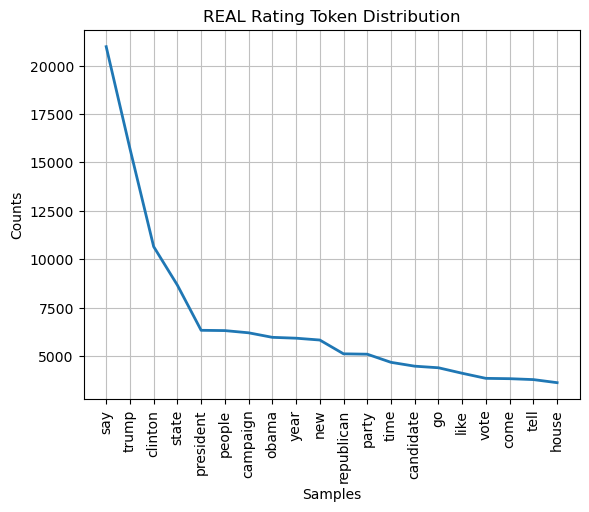

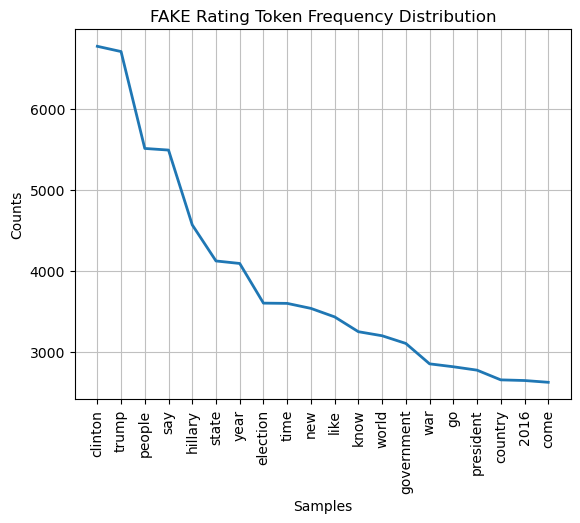

In [51]:
## Create list of all tokens in all documents
real_words = REAL['spacy_lemmas'].explode().to_list()
fake_words = FAKE['spacy_lemmas'].explode().to_list()

## Instantiate high frequency distribution
high_freq_dist = FreqDist(real_words)
low_freq_dist = FreqDist(fake_words)

## Plot the distribution
high_freq_dist.plot(20, title='REAL Rating Token Distribution')

low_freq_dist.plot(20, title='FAKE Rating Token Frequency Distribution');

# Word Clouds

In [60]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [55]:
## Join the original text for each group
real_text_joined = " ".join(REAL['text'])
fake_text_joined = " ".join(FAKE['text'])

In [56]:
def plot_wordclouds(high_cloud, low_cloud, title='Comparing Word Usage'):
    """Plots the wordlcouds for our two groups"""
    ## Plot the Images
    fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
    axes[0].imshow(high_cloud)
    axes[0].set_title('Real Article')
    axes[0].axis('off')
    
    axes[1].imshow(low_cloud)
    axes[1].set_title('Fake Article')
    axes[1].axis('off')
    fig.tight_layout()
    
    fig.suptitle(title,y=1.0, fontsize='xx-large');
    return fig

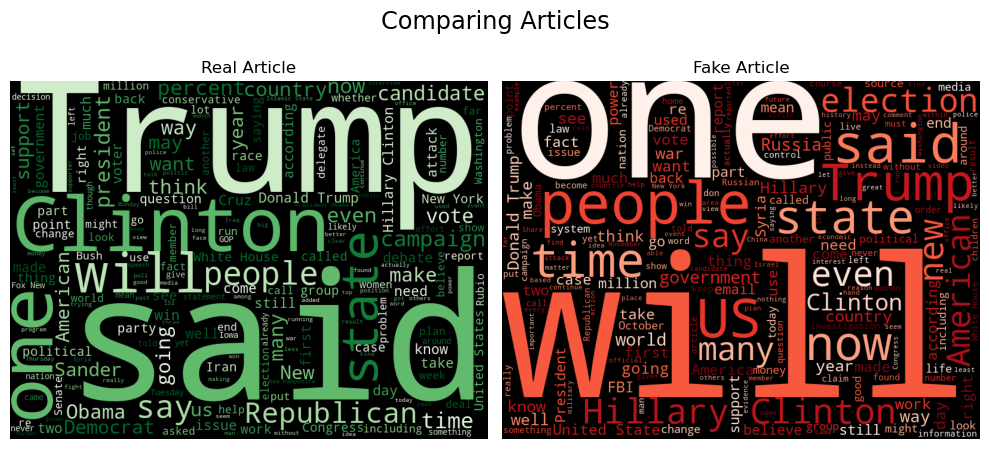

In [61]:
## Generate the WordCloud Images
wordcloud_kws = dict(min_word_length=2,width=800, height=600, random_state=42)
high_cloud = WordCloud(**wordcloud_kws, colormap='Greens').generate(real_text_joined)
low_cloud = WordCloud(**wordcloud_kws, colormap='Reds').generate(fake_text_joined)

fig = plot_wordclouds(high_cloud, low_cloud, title="Comparing Articles")

